In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 10.8 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
import unidecode
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.impute import SimpleImputer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = '/content/drive/MyDrive/MMA'
 
df= pd.read_csv(project_path + '/enron.csv')

In [ ]:
df.head()

,Message-ID,Date,From,To,Subject,Message,Cc,Bcc
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,Here is our forecast\n\n \n,NaN,NaN
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,Traveling to have a business meeting takes the...,NaN,NaN
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,test successful. way to go!!!\n,NaN,NaN
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",NaN,NaN
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45. \n,NaN,NaN


In [ ]:
missing_prop=df.isna().sum()/len(df)
missing_prop[missing_prop>0].sort_values(ascending=False)

Cc         0.752840
Bcc        0.752840
To         0.042225
Subject    0.037081
dtype: float64

In [ ]:
for col in df.columns:
  print(col,df[col].nunique())

In [ ]:
df.dtypes

In [ ]:
def employee(field):
    column = []
    for string in field:
        column.append(string.split("@")[0])
    return column

df['employee_from'] = employee(df['From'])

In [ ]:
#filling in Null with empty string to perform transformation on it
df['To']=df['To'].fillna("")
df['employee_to'] = employee(df['To'])

Getting top 20 email sender employees

In [ ]:
top_20 = pd.DataFrame(df['employee_from'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name_sender", "Counts"]
top_20

,Employee_name_sender,Counts
0,kay.mann,16735
1,vince.kaminski,14368
2,jeff.dasovich,11411
3,pete.davis,9149
4,chris.germany,8801
5,sara.shackleton,8777
6,enron.announcements,8587
7,tana.jones,8490
8,steven.kean,6759
9,kate.symes,5438


<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Top 20 highest email sender employee')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Employee_name')

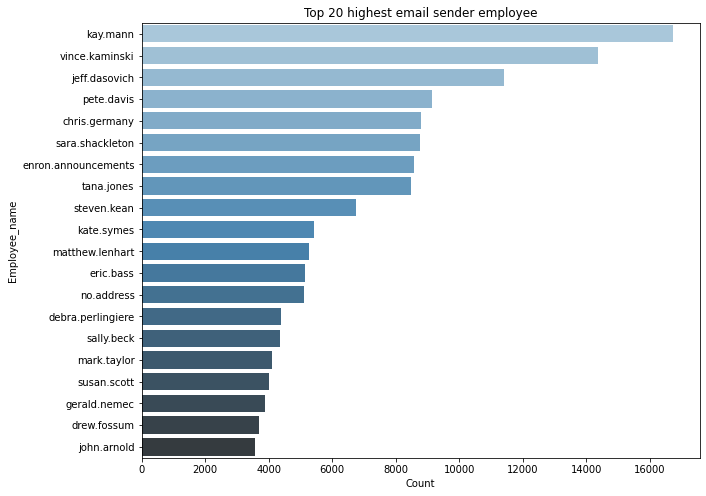

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name_sender", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

Getting top 20 email receiving employees

In [ ]:
top_20_receiver = pd.DataFrame(df['employee_to'].value_counts()[:20])
top_20_receiver.reset_index(inplace=True)
top_20_receiver.columns = ["Employee_name_receiver", "Counts"]

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Top 20 highest email recipients among employees')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Employee_name')

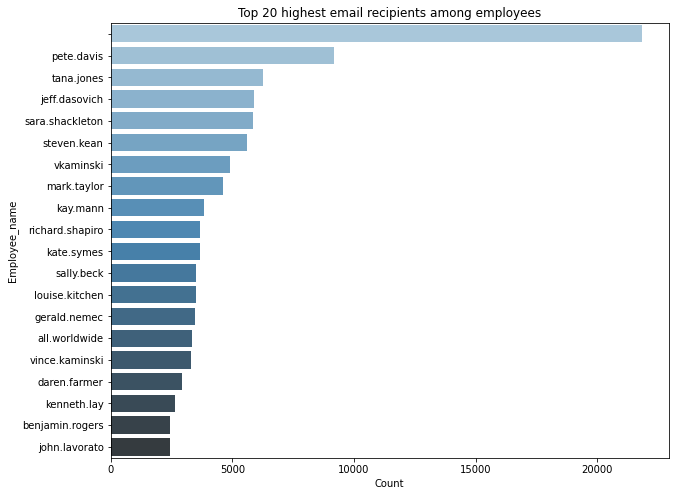

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name_receiver", x="Counts", data=top_20_receiver, palette="Blues_d")
plt.title("Top 20 highest email recipients among employees")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [ ]:
import datetime
from dateutil import parser

def change_type(row):
  return parser.parse(row).strftime("%d-%m-%Y %H:%M:%S")
df['Date'] = df['Date'].apply(change_type)
df.head(2)

,Message-ID,Date,From,To,Subject,Message,Cc,Bcc,employee_from,employee_to
0,<18782981.1075855378110.JavaMail.evans@thyme>,14-05-2001 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,Here is our forecast\n\n \n,NaN,NaN,phillip.allen,tim.belden
1,<15464986.1075855378456.JavaMail.evans@thyme>,04-05-2001 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Traveling to have a business meeting takes the...,NaN,NaN,phillip.allen,john.lavorato


In [ ]:
df['Subject']=df['Subject'].replace('',np.nan)

In [ ]:
df[df['Subject']=='']

,Message-ID,Date,From,To,Subject,Message,Cc,Bcc,employee_from,employee_to


In [ ]:
# fixing subject column
imputer_cat = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer_cat.fit(df[['Subject']])
df['Subject'] = imputer_cat.transform(df[['Subject']])

SimpleImputer(strategy='constant')

In [ ]:
def clean_subject(text):
  text=text.lower()
  text=re.sub(r're:', '', text).strip()
  text=re.sub(r'fw:', '', text).strip()
  return text
df['Subject'] = df['Subject'].apply(clean_subject)

In [ ]:
df['Subject']

0                     missing_value
1                     missing_value
2                              test
3                     missing_value
4                             hello
                    ...            
517396     trade with john lavorato
517397                   gas hedges
517398                 confidential
517399    calgary analyst/associate
517400                 ali's essays
Name: Subject, Length: 517401, dtype: object

Text(0.5, 1.0, 'Top 10 email subjects')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Subject')

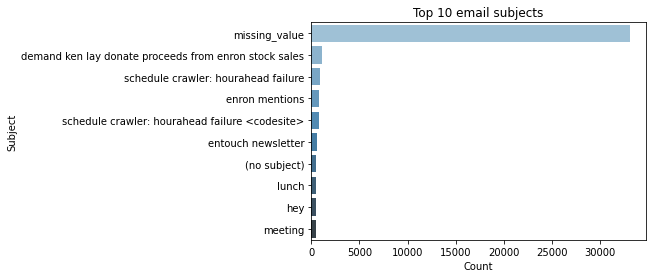

In [ ]:
#Most frequent Subject
sns.barplot(y=df['Subject'].value_counts()[:10].index,
            x=df['Subject'].value_counts()[:10],
            orient='h',palette="Blues_d")
plt.title("Top 10 email subjects")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.show()

In [ ]:
#just for trial purposes
df1=df.copy()
#df1=df1[:30000]

In [ ]:
df1.shape

(30000, 10)

In [ ]:
#data preprocessing 
wn=nltk.WordNetLemmatizer()
stop_words=set(stopwords.words('english')+['pm','phillip'])

def clean_text(text):
        text = BeautifulSoup(text, ["lxml"]).get_text()        
        text="".join([char.lower() for char in text if char not in string.punctuation])
        text= re.sub(r'\d+', '', text)
        text=re.sub(r'\n', '', text).strip()
        tokens=nltk.word_tokenize(text.strip())
        text=[t for t in tokens if t not in stop_words]
        text=[unidecode.unidecode(w) for w in text]
        text=" ".join([wn.lemmatize(word)for word in text])
        return text

df1["Message_clean"]=df1["Message"].apply(lambda x:clean_text(x))

In [ ]:
df1.head()

,Message-ID,Date,From,To,Subject,Message,Cc,Bcc,employee_from,employee_to,Message_clean
0,<18782981.1075855378110.JavaMail.evans@thyme>,14-05-2001 16:39:00,phillip.allen@enron.com,tim.belden@enron.com,missing_value,Here is our forecast\n\n \n,NaN,NaN,phillip.allen,tim.belden,forecast
1,<15464986.1075855378456.JavaMail.evans@thyme>,04-05-2001 13:51:00,phillip.allen@enron.com,john.lavorato@enron.com,,Traveling to have a business meeting takes the...,NaN,NaN,phillip.allen,john.lavorato,traveling business meeting take fun trip espec...
2,<24216240.1075855687451.JavaMail.evans@thyme>,18-10-2000 03:00:00,phillip.allen@enron.com,leah.arsdall@enron.com,test,test successful. way to go!!!\n,NaN,NaN,phillip.allen,leah.arsdall,test successful way go
3,<13505866.1075863688222.JavaMail.evans@thyme>,23-10-2000 06:13:00,phillip.allen@enron.com,randall.gay@enron.com,missing_value,"Randy,\n\n Can you send me a schedule of the s...",NaN,NaN,phillip.allen,randall.gay,randy send schedule salary level everyone sche...
4,<30922949.1075863688243.JavaMail.evans@thyme>,31-08-2000 05:07:00,phillip.allen@enron.com,greg.piper@enron.com,hello,Let's shoot for Tuesday at 11:45. \n,NaN,NaN,phillip.allen,greg.piper,let shoot tuesday


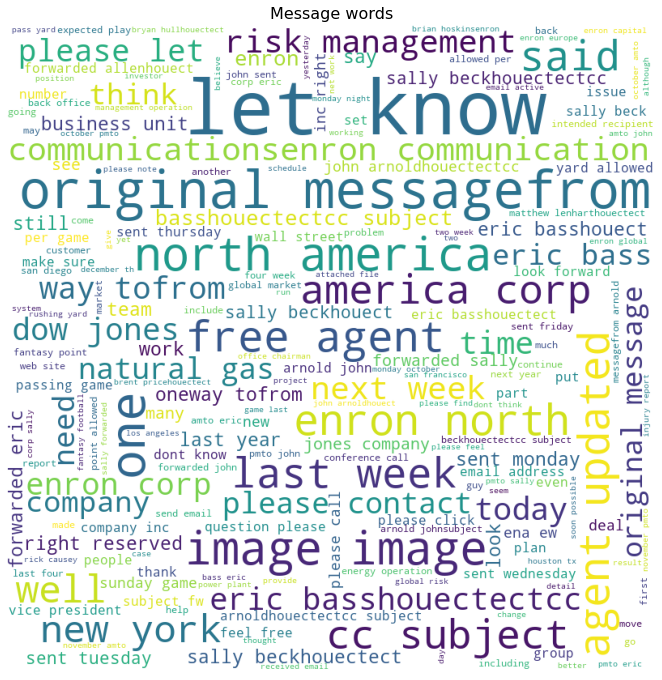

In [ ]:
#Checking most popular words in text for non disaster and disaster
df_=pd.DataFrame(df1['Message_clean'])
df_all= ' '.join(df_['Message_clean'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(df_all)
 
# plot the WordCloud image                       
_=plt.figure(figsize = (9, 9), facecolor = None)
_=plt.imshow(wordcloud)
_=plt.axis("off")
_=plt.tight_layout(pad = 0)
_=plt.title('Message words',size=16)

plt.show()

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=10,
                            max_features=2000, #only keep 2000 most frequent words
                            ngram_range=[1,3]) 

dtm = vectorizer.fit_transform(df1['Message_clean'])

In [ ]:
#chose 10 for n_components
lda_model = LatentDirichletAllocation(n_components=7,
                                      doc_topic_prior=None,
                                      topic_word_prior=None,
                                      max_iter=200, 
                                      learning_method='batch', 
                                      random_state=42,
                                      n_jobs=2,
                                      verbose=0)
lda_output = lda_model.fit(dtm)

# Log Likelyhood: Higher the better
ll = lda_model.score(dtm)

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
perp = lda_model.perplexity(dtm)

In [ ]:
#top words per topic

for i,topic in enumerate(lda_model.components_):
    print("\n")
    print(f"The top 10 words for topic # {i}\n")
    for index in topic.argsort()[-10:]:
        print(vectorizer.get_feature_names()[index])



The top 10 words for topic # 0

one
time
think
let
going
good
week
get
know
game


The top 10 words for topic # 1

site
please click
name
received
id
please
image
request
click
email


The top 10 words for topic # 2

need
bid
enron
power
deal
price
would
gas
company
market


The top 10 words for topic # 3

risk
group
know
business
office
would
please
enron
meeting
sally


The top 10 words for topic # 4

find
message
report
index
please find
gas
file
email
attached
please


The top 10 words for topic # 5

america corp
north america corp
john
eric basshouectectcc subject
basshouectectcc subject
basshouectectcc
eric basshouectectcc
forwarded
subject
eric


The top 10 words for topic # 6

arnoldhouectectcc
arnold
amto
pmto
john
original messagefrom
sent
bass
messagefrom
original


In [ ]:
doc_clean=[clean_text(doc).split() for doc in df1['Message_clean']]

In [ ]:
dictionary=corpora.Dictionary(doc_clean)
doc_term_matrix=[dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [ ]:
print(lda_model.print_topics(num_topics=8))

[(0, '0.027*"business" + 0.023*"trading" + 0.019*"dynegy" + 0.015*"power" + 0.013*"market" + 0.011*"energy" + 0.011*"price" + 0.011*"inc" + 0.010*"forwarded" + 0.010*"new"'), (1, '0.017*"enrons" + 0.017*"share" + 0.014*"report" + 0.013*"jan" + 0.013*"stock" + 0.012*"financial" + 0.012*"review" + 0.011*"billion" + 0.011*"credit" + 0.010*"transaction"'), (2, '0.056*"enron" + 0.014*"information" + 0.013*"position" + 0.012*"process" + 0.011*"week" + 0.011*"management" + 0.010*"office" + 0.010*"book" + 0.010*"issue" + 0.009*"team"'), (3, '0.070*"company" + 0.012*"news" + 0.010*"exchange" + 0.010*"dont" + 0.009*"area" + 0.008*"another" + 0.008*"past" + 0.006*"quarter" + 0.006*"wall" + 0.006*"return"'), (4, '0.037*"said" + 0.021*"email" + 0.020*"change" + 0.019*"messagefrom" + 0.019*"next" + 0.016*"sent" + 0.012*"week" + 0.011*"tuesday" + 0.011*"available" + 0.010*"made"'), (5, '0.020*"would" + 0.018*"please" + 0.017*"need" + 0.016*"time" + 0.016*"risk" + 0.015*"deal" + 0.014*"group" + 0.014*

Text(0.5, 1.0, 'Topic 0')

(-0.5, 2499.5, 1799.5, -0.5)

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

Text(0.5, 1.0, 'Topic 4')

(-0.5, 2499.5, 1799.5, -0.5)

Text(0.5, 1.0, 'Topic 5')

(-0.5, 2499.5, 1799.5, -0.5)

Text(0.5, 1.0, 'Topic 6')

(-0.5, 2499.5, 1799.5, -0.5)

Text(0.5, 1.0, 'Topic 7')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

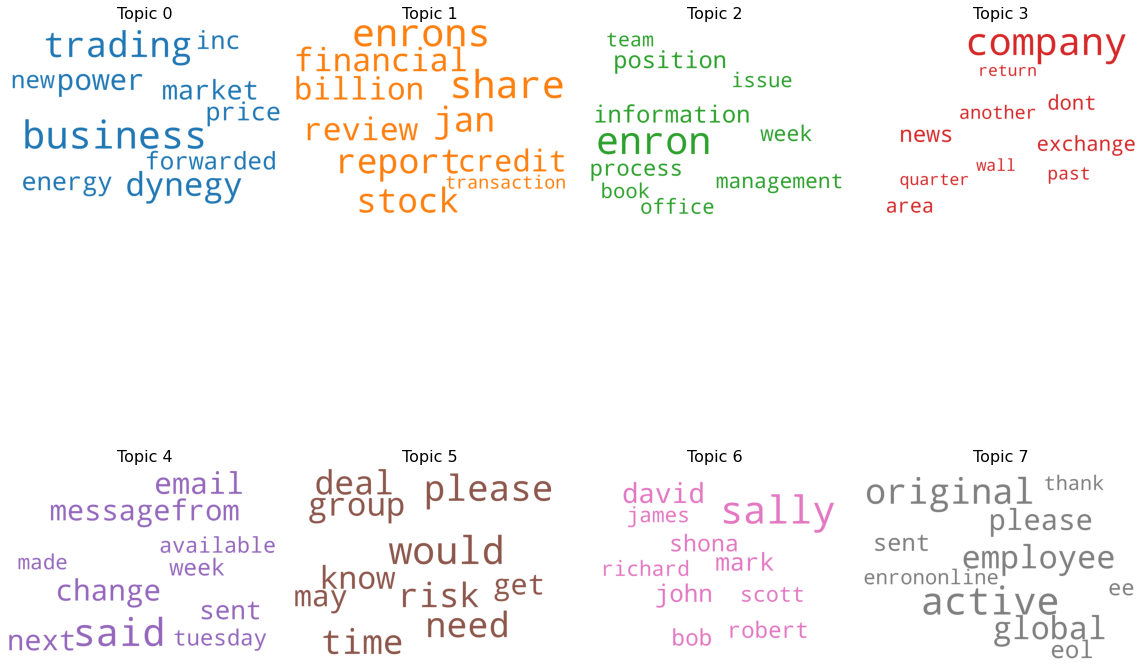

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(16,16), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=350)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()